In [31]:
!pip install tensorflow==2.4.3

In [32]:
import tensorflow as tf
tf.__version__

'2.4.3'

In [36]:
!pip install -q -U tensorflow-text

     |████████████████████████████████| 4.9 MB 5.4 MB/s 
     |████████████████████████████████| 489.6 MB 24 kB/s 
     |████████████████████████████████| 463 kB 47.9 MB/s 


In [37]:
!pip install -q tf-models-official

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 31.9 MB/s 
     |████████████████████████████████| 90 kB 8.7 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 47.7 MB 1.9 MB/s 
     |████████████████████████████████| 596 kB 31.7 MB/s 
     |████████████████████████████████| 352 kB 34.9 MB/s 
     |████████████████████████████████| 213 kB 28.9 MB/s 
     |████████████████████████████████| 1.1 MB 15.6 MB/s 
     |████████████████████████████████| 99 kB 7.4 MB/s 


In [87]:
pip install flask

In [41]:
import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [45]:
from tensorflow.keras import utils

data_url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz'

dataset_dir = tf.keras.utils.get_file('amazon_reviews_us_Watches_v1_00.tsv.gz',
    origin=data_url,
    untar=False,
    cache_dir='.',
    cache_subdir='',
    extract=True
    )

162979840/162973819 [==============================] - 2s 0us/step


In [47]:
import gzip
import shutil
with gzip.open('amazon_reviews_us_Watches_v1_00.tsv.gz', 'rb') as f_in:
    with open('amazon_reviews_us_Watches_v1_00.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [48]:
import pandas as pd
df = pd.read_csv('/content/amazon_reviews_us_Watches_v1_00.tsv', sep='\t',error_bad_lines=False)

b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: expected 15 fields, saw 22\nSkipping line 197432: expected 15 fields, saw 22\nSkipping line 208016: expected 15 fields, saw 22\nSkipping line 214110: expected 15 fields, saw 22\nSkipping line 244328: expected 15 fields, saw 22\nSkipping line 248519: expected 15 fields,

In [49]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


In [50]:
df['sentiments'] = df.star_rating.apply(lambda x: 0 if x in [1, 2, 3] else 1)

In [51]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiments
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31,1
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31,1
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31,0
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31,1
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31,1


In [52]:
df[df['sentiments']==1]['review_id'][1]

'RKH8BNC3L5DLF'

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow import keras
import pickle

In [54]:
tokenizer = Tokenizer(oov_token="<OOV>")

In [55]:
split = round(len(df)*0.8)
train_reviews = df['review_id'][:split]
train_label = df['sentiments'][:split]
test_reviews = df['review_id'][split:]
test_label = df['sentiments'][split:]

In [56]:
train_reviews

0         R3O9SGZBVQBV76
1          RKH8BNC3L5DLF
2         R2HLE8WKZSU3NL
3         R31U3UH5AZ42LL
4         R2SV659OUJ945Y
               ...      
768158    R3G4JVR1FRW9XZ
768159    R31Y7VNLTJBE6D
768160    R1WOGR54VUOVYT
768161    R14ZUA7XPGH52O
768162    R3VWQRQO7QVEWJ
Name: review_id, Length: 768163, dtype: object

In [57]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for column in train_reviews:
    training_sentences.append(str(column))
for column in train_label:
    training_labels.append(column)
for column in test_reviews:
    testing_sentences.append(str(column))
for column in test_label:
    testing_labels.append(column)

In [58]:
training_sentences

['R3O9SGZBVQBV76',
 'RKH8BNC3L5DLF',
 'R2HLE8WKZSU3NL',
 'R31U3UH5AZ42LL',
 'R2SV659OUJ945Y',
 'RA51CP8TR5A2L',
 'RB2Q7DLDN6TH6',
 'R2RHFJV0UYBK3Y',
 'R2Z6JOQ94LFHEP',
 'RX27XIIWY5JPB',
 'R15C7QEZT0LGZN',
 'R361XSS37V0NCZ',
 'ROTNLALUAJAUB',
 'R2DYX7QU6BGOHR',
 'RWASY7FKI7QOT',
 'R2KKYZIN3CCL21',
 'R22H4FGVD5O52O',
 'R11UACZERCM4ZY',
 'R1AT8NQ38UQOL6',
 'R2NCZRQGIF1Q75',
 'RJ9HWWMU4IAHF',
 'R3CNTCKG352GL1',
 'R9Q2LDSES6NBL',
 'R3629T8HDV5VWU',
 'R2CLMKC0IVZ9UX',
 'R2QGEJRU4ENYN2',
 'R2E5STTYU6LTSC',
 'RI97MTVX08KWX',
 'RK20LJG750ERC',
 'R1HQZDBB90LMFH',
 'R2XHQHGXIEYTNI',
 'R2BVFRIR7A5UD1',
 'R3O51G2D52W9DD',
 'R2O0LW0AZ67P3X',
 'R2KBTEW8GUENVS',
 'R2R4XPHTT9CCBN',
 'R7GHUDPGT3WJC',
 'R364RU42RZ606Z',
 'R2D5SV3UNHQPYZ',
 'R15OQG60W2R4PQ',
 'R2XF4SMK4HKNVV',
 'RQ70UFZVX7UVJ',
 'R2288KJ7D0H149',
 'RKJ0UN6XEJKIP',
 'R3VFQZTEST0L7U',
 'RLQ8MLTO09215',
 'R2PCHVAM074L1I',
 'R2WV1IG5ORN33W',
 'R2X7VDDS4ISTBC',
 'R2POCZUBL0D0NX',
 'R2Z9C8BYOJF24I',
 'R1EBMIQ69CZ64',
 'R2PVH1MHLKN9A7',
 'R1SOUO

In [59]:
training_sentences[0]

'R3O9SGZBVQBV76'

In [60]:
training_labels[0]

1

In [61]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [62]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [63]:
tokenizer

In [64]:
sequences = tokenizer.texts_to_sequences(training_sentences)

In [65]:
sequences

[[2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134],
 [135],
 [136],
 [137],
 [138],
 [139],
 [

In [66]:
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

In [67]:
padded

array([[0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [68]:
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [69]:
type(training_labels)

list

In [70]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [71]:
training_labels_final

array([1, 1, 0, ..., 1, 0, 1])

In [72]:
testing_labels_final

array([1, 1, 0, ..., 1, 1, 1])

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
24006/24006 [==============================] - 262s 11ms/step - loss: 0.5346 - accuracy: 0.7762 - val_loss: 0.5388 - val_accuracy: 0.7704
Epoch 2/20
24006/24006 [==============================] - 258s 11ms/step - loss: 0.5330 - accuracy: 0.7753 - val_loss: 0.5391 - val_accuracy: 0.7704
Epoch 3/20
24006/24006 [==============================] - 258s 11ms/step - loss: 0.5319 - accuracy: 0.7761 - val_loss: 0.5388 - val_accuracy: 0.7704
Epoch 4/20
24006/24006 [==============================] - 258s 11ms/step - loss: 0.5317 - accuracy: 0.7763 - val_loss: 0.5388 - val_accuracy: 0.7704
Epoch 5/20
24006/24006 [==============================] - 258s 11ms/step - loss: 0.5313 - accuracy: 0.7766 - val_loss: 0.5391 - val_accuracy: 0.7704
Epoch 6/20
24006/24006 [==============================] - 258s 11ms/step - loss: 0.5329 - accuracy: 0.7753 - val_loss: 0.5390 - val_accuracy: 0.7704
Epoch 7/20
24006/24006 [==============================] - 258s 11ms/step - loss: 0.5327 - accuracy: 0.7754

In [75]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.5423319697380066)

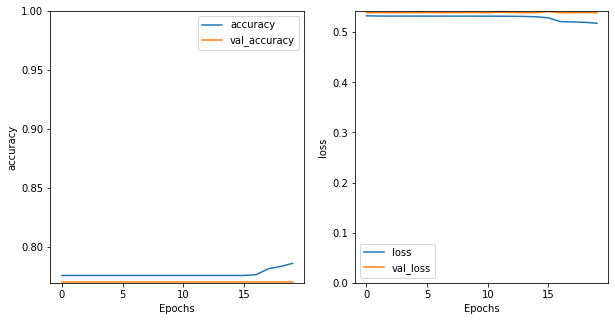

In [76]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [77]:
sample_text = [df[df['sentiments']==1]['review_id'][1]]
sample_text

['RKH8BNC3L5DLF']

In [78]:
sample_sequences = tokenizer.texts_to_sequences(sample_text)

In [79]:
sample_padded = pad_sequences(sample_sequences, maxlen=max_length, truncating=trunc_type)

In [80]:
predictions = model.predict(sample_padded)
predictions

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.9998541]], dtype=float32)

In [81]:
if predictions[0][0] > 0.5:
  print('Review Positive')
else:
  print('Review Negative')

Review Positive


In [85]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [83]:
model.save('./test_model', save_format='tf')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ./test_model/assets


In [86]:
!zip -r 'test_model.zip' 'test_model'

updating: test_model/ (stored 0%)
updating: test_model/saved_model.pb (deflated 87%)
updating: test_model/assets/ (stored 0%)
updating: test_model/variables/ (stored 0%)
updating: test_model/variables/variables.index (deflated 61%)
updating: test_model/variables/variables.data-00000-of-00001 (deflated 34%)
